In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# import empyrical as ep

import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pyfolio as pf

# Set formatting for graph

def set_axes(ax):
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    major_fmt = mdates.DateFormatter('%b %Y')

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(major_fmt)
    ax.xaxis.set_minor_locator(months)    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 422 entries, 2018-08-01 to 2020-04-03
Data columns (total 2 columns):
adjclose    422 non-null float64
EMA12       422 non-null float64
dtypes: float64(2)
memory usage: 9.9 KB


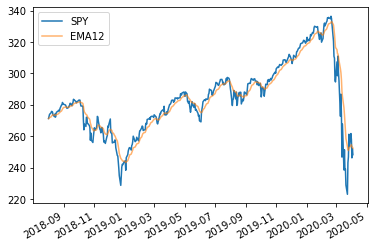

In [5]:
# Fig 2 - SPDR S&P 500 (SPY) daily closing prices for the period of August 2018 to April 2020, 
# as representative of US stock market
fig2_data = pd.read_csv('fig2.csv', index_col=[0], parse_dates=True)
fig2_data.info()

ax2 = fig2_data['adjclose'].plot(legend=True, x=fig2_data.index, label='SPY', alpha=1.0)
fig2_data['EMA12'].plot(ax=ax2, legend=True, label='EMA12', alpha=0.6)


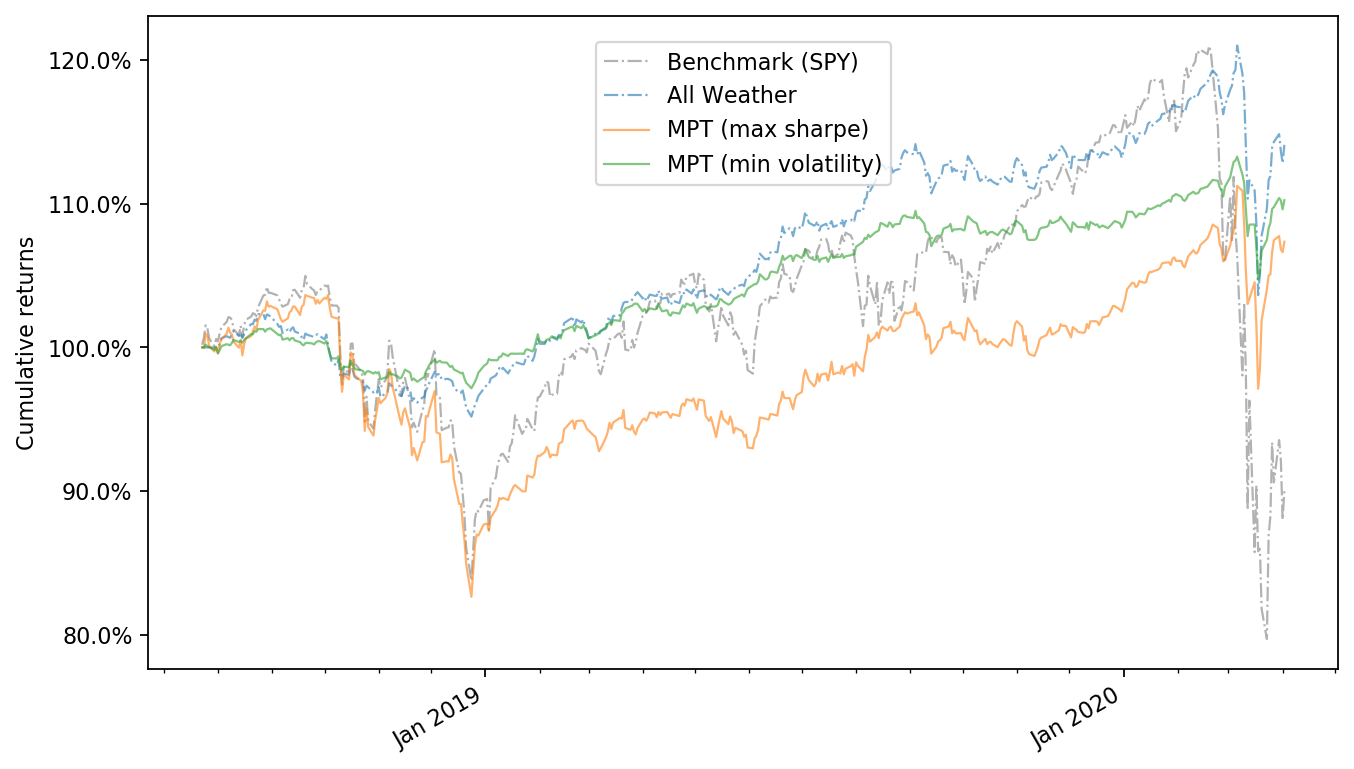

In [6]:
fig4a_data = pd.read_csv("fig4a.csv", index_col=[0], parse_dates=True)


figure(num=None, figsize=(12, 6), dpi=160, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('Cumulative returns')
ax.set_yscale('linear')

fig4a_data['Benchmark (SPY)'].plot(lw=1, color='gray', label='Benchmark (SPY)', alpha=0.60, ax=ax, style=['-.'])
fig4a_data[['All Weather', 'MPT (max sharpe)', 'MPT (min volatility)']].plot(lw=1, ax=ax, alpha=0.6, style=['-.'])

set_axes(ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.85))

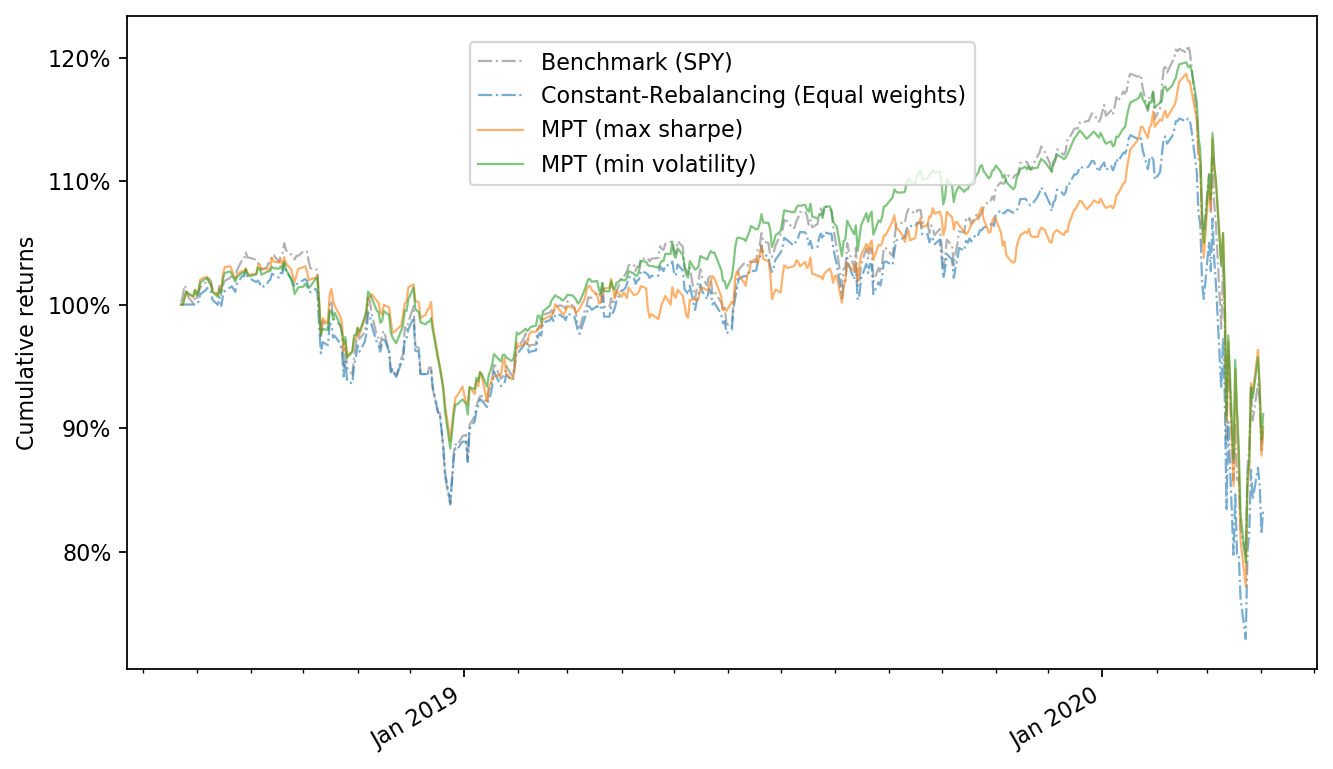

In [7]:
fig4b_data = pd.read_csv("fig4b.csv", index_col=[0], parse_dates=True)


figure(num=None, figsize=(12, 6), dpi=160, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('Cumulative returns')
ax.set_yscale('linear')

fig4b_data['Benchmark (SPY)'].plot(lw=1, color='gray', label='Benchmark (SPY)', alpha=0.60, ax=ax, style=['-.'])
fig4b_data[['Constant-Rebalancing (Equal weights)', 'MPT (max sharpe)', 'MPT (min volatility)']].plot(lw=1, ax=ax, alpha=0.6, style=['-.'])

set_axes(ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.85))

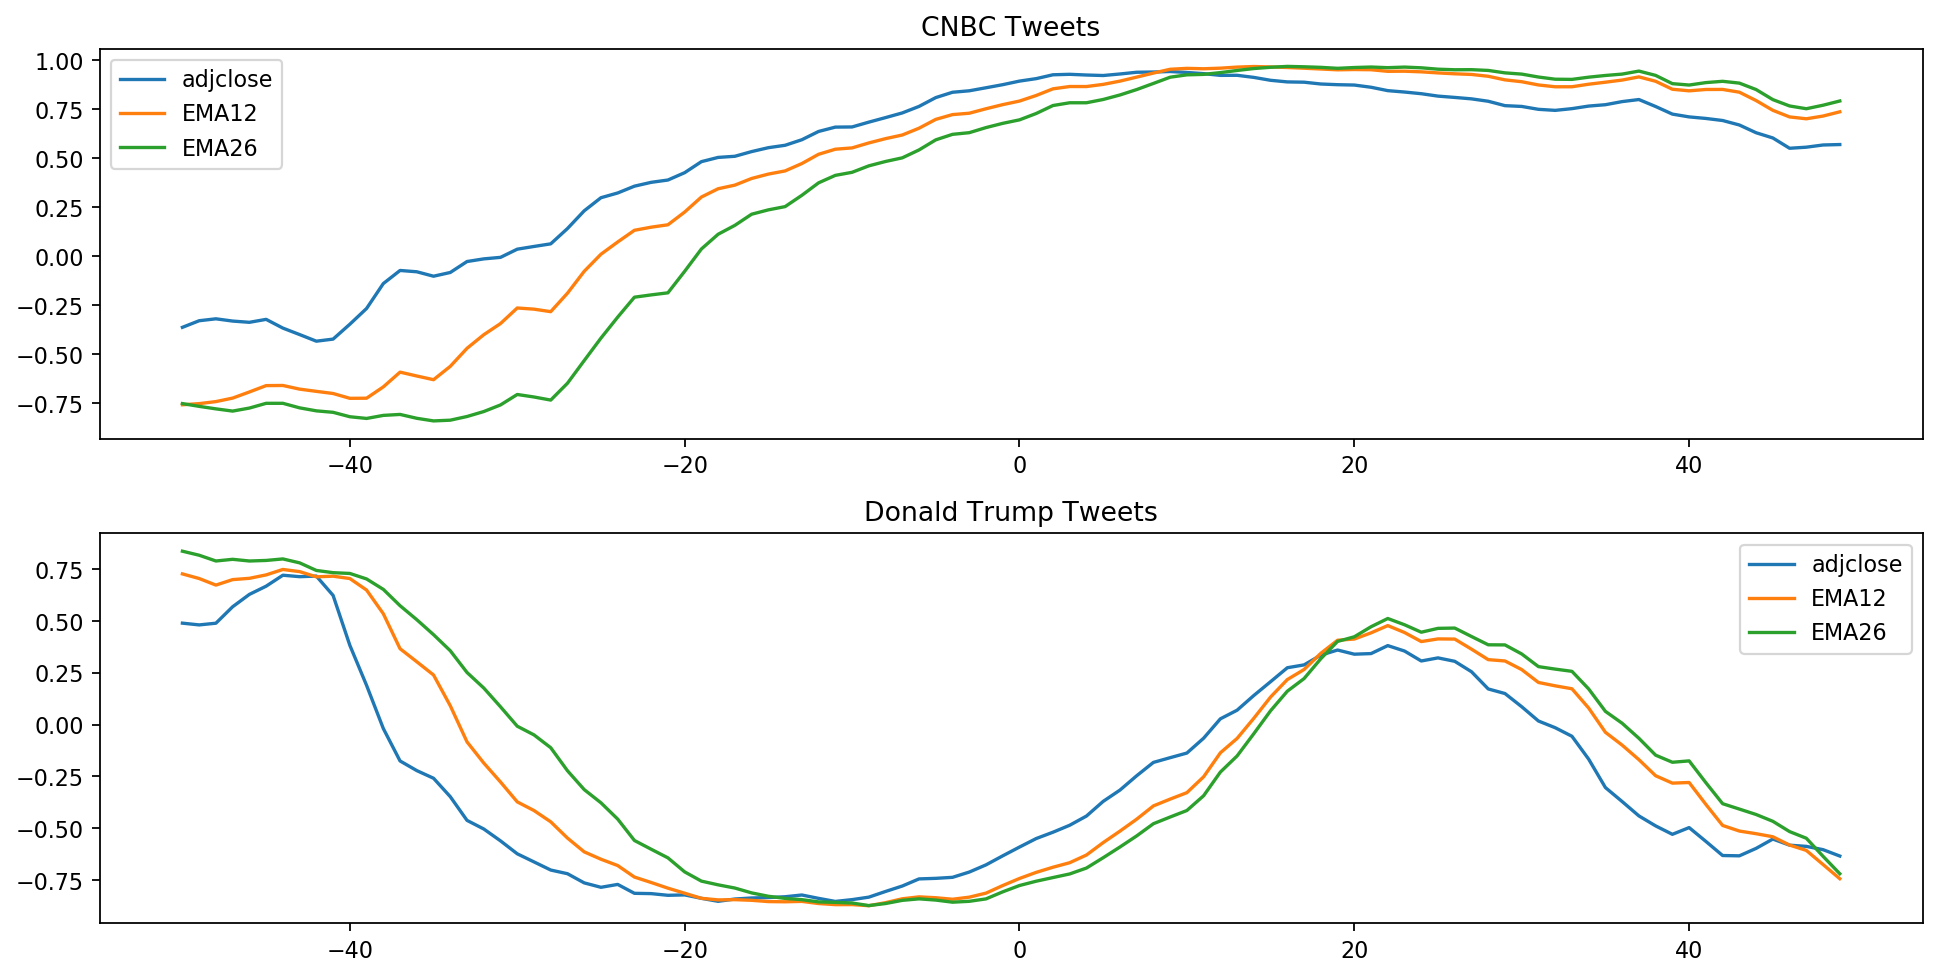

In [8]:
# Fig 5 - Pearson coefficient against day-shifts for CNBC and Donald Trump’s tweets
df_corr_cnbc = pd.read_csv("fig5_cnbc.csv", index_col=[0])
df_corr_donald = pd.read_csv("fig5_donald.csv", index_col=[0])

fig, axes = plt.subplots(nrows=2,ncols=1, constrained_layout=True, figsize=(12,6), dpi=160)
axes[0].set_title("CNBC Tweets")
axes[1].set_title("Donald Trump Tweets")
df_corr_cnbc.plot(ax=axes[0])
df_corr_donald.plot(ax=axes[1])

# plt.savefig("fig5.pdf", bbox_inches="tight")  # for report

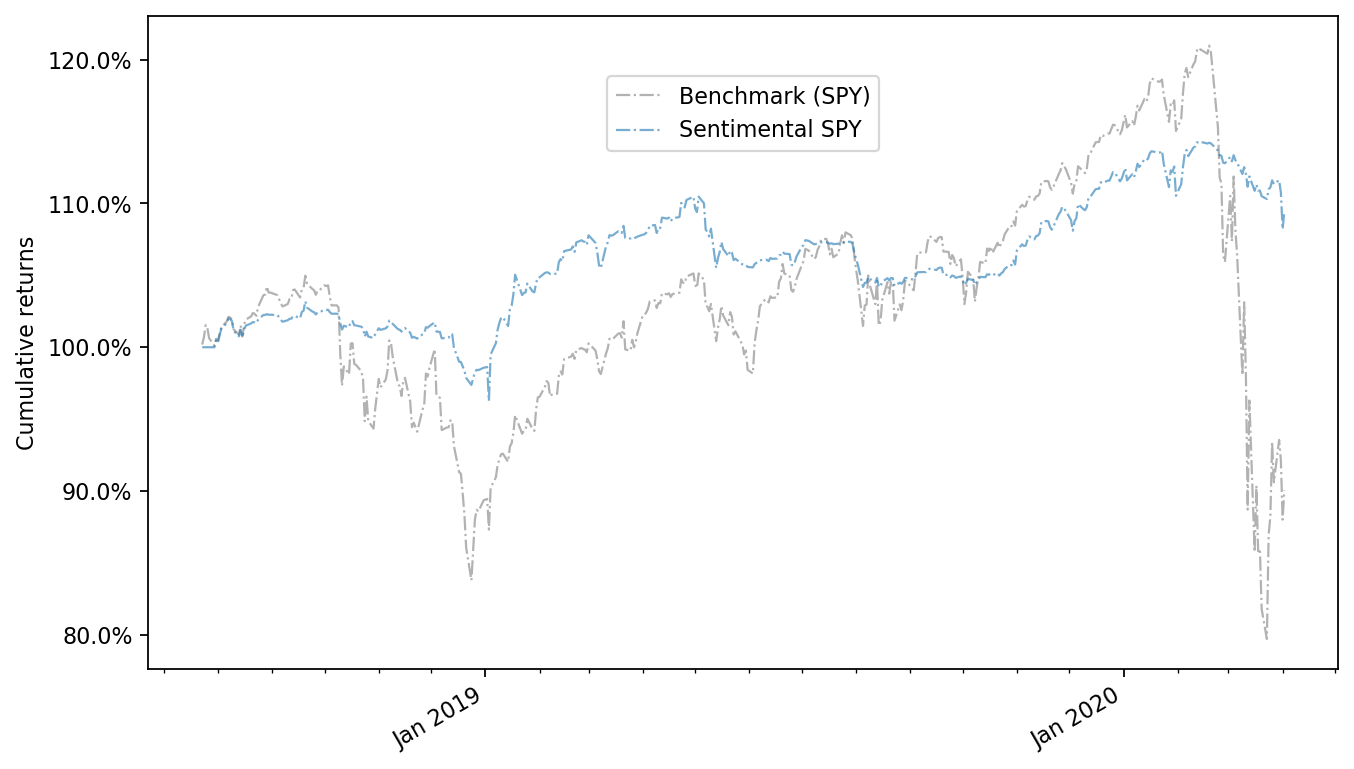

In [9]:
# Fig 6 - Sentimental-SPY Portfolio
fig6_data = pd.read_csv("fig6.csv", index_col=[0], parse_dates=True)


figure(num=None, figsize=(12, 6), dpi=160, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('Cumulative returns')
ax.set_yscale('linear')

fig6_data['Benchmark (SPY)'].plot(lw=1, color='gray', label='Benchmark (SPY)', alpha=0.60, ax=ax, style=['-.'])
fig6_data[['Sentimental SPY']].plot(lw=1, ax=ax, alpha=0.6, style=['-.'])

set_axes(ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center', bbox_to_anchor=(0.5, 0.85))

In [10]:
# Fig 7a, Fig 7b - Comparison of Sentiment-adjusted portfolios on out-of-sample data

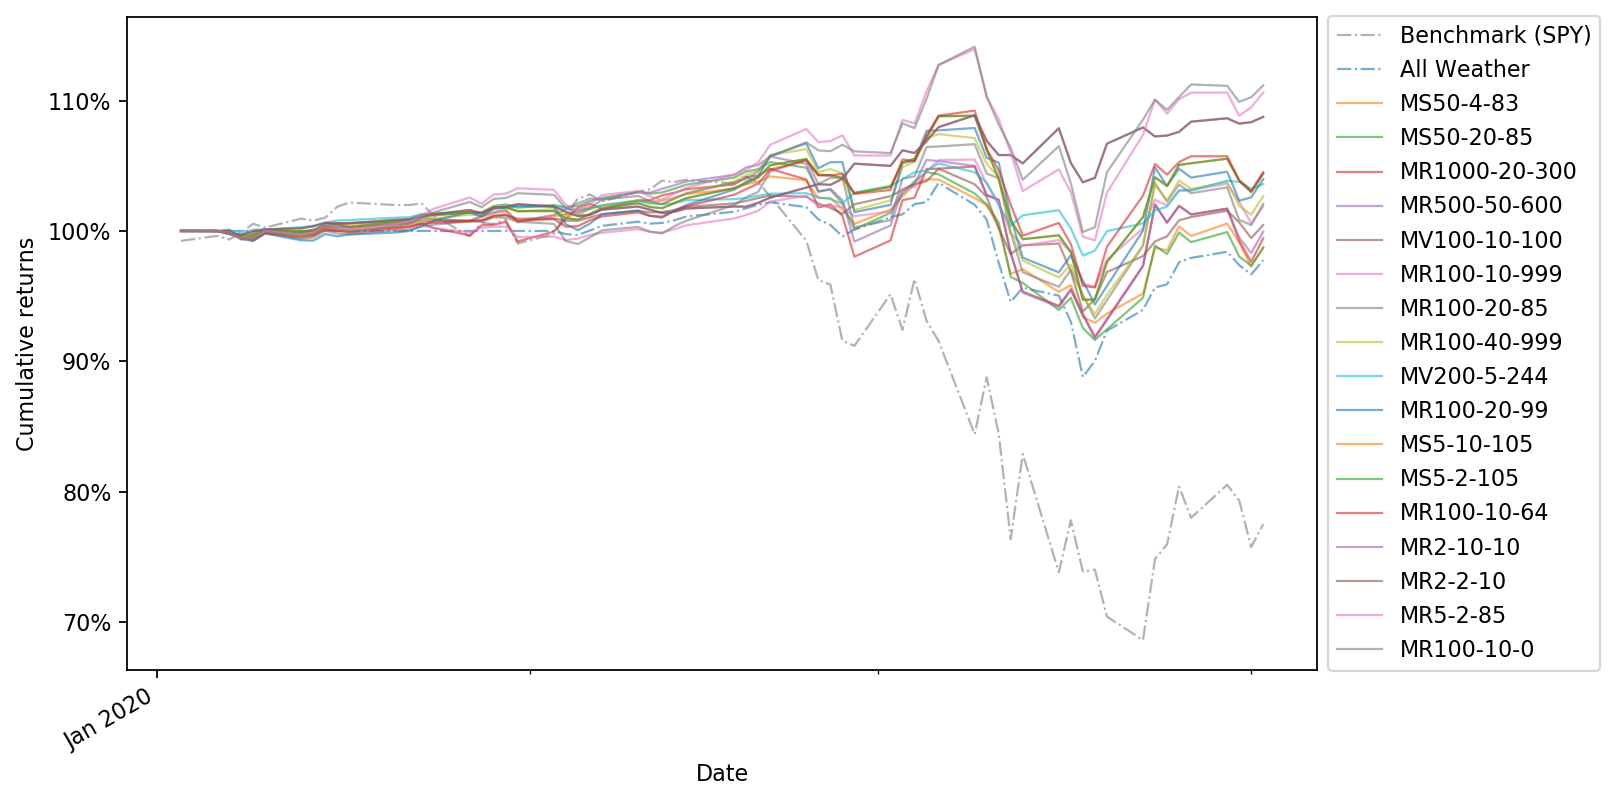

In [11]:
fig7a_data = pd.read_csv("fig7a.csv", index_col=[0], parse_dates=True)


figure(num=None, figsize=(12, 6), dpi=160, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('Cumulative returns')
ax.set_yscale('linear')

fig7a_data['Benchmark (SPY)'].plot(lw=1, color='gray', label='Benchmark (SPY)', alpha=0.60, ax=ax, style=['-.'])
# fig7a_data[['Sentimental SPY']].plot(lw=1, ax=ax, alpha=0.6, style=['-.'])
fig7a_data.drop(['Benchmark (SPY)'], axis=1).plot(lw=1, ax=ax, alpha=0.6, style=['-.'])

set_axes(ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

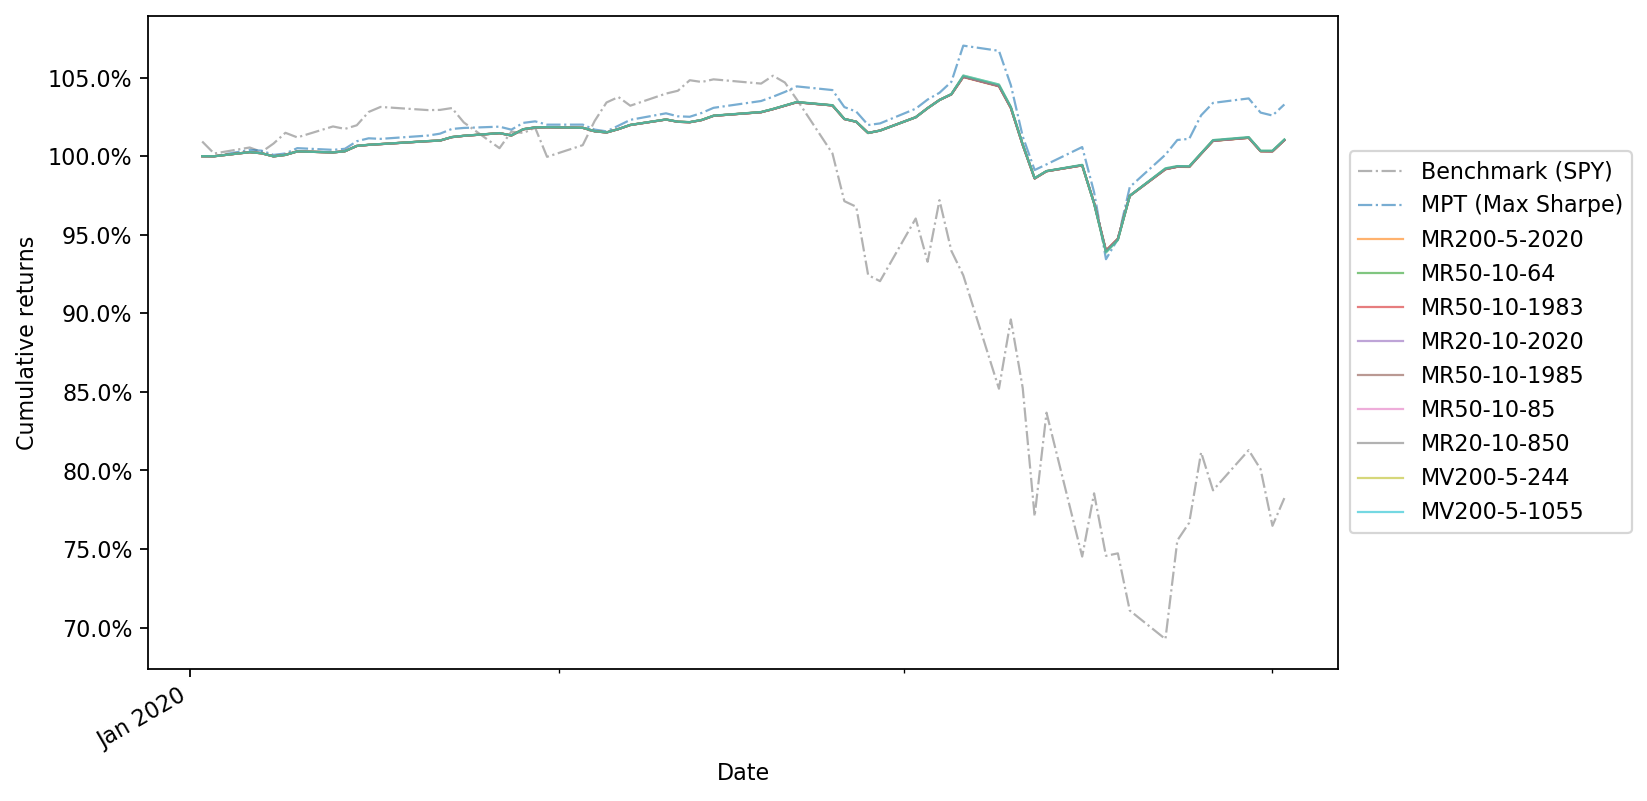

In [12]:
fig7b_data = pd.read_csv("fig7b.csv", index_col=[0], parse_dates=True)


figure(num=None, figsize=(12, 6), dpi=160, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('Cumulative returns')
ax.set_yscale('linear')

fig7b_data['Benchmark (SPY)'].plot(lw=1, color='gray', label='Benchmark (SPY)', alpha=0.60, ax=ax, style=['-.'])
# fig7a_data[['Sentimental SPY']].plot(lw=1, ax=ax, alpha=0.6, style=['-.'])
fig7b_data.drop(['Benchmark (SPY)'], axis=1).plot(lw=1, ax=ax, alpha=0.6, style=['-.'])

set_axes(ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))